In [1]:
!pip install qiskit ipywidgets

     |████████████████████████████████| 6.0MB 20.5MB/s 
     |████████████████████████████████| 18.0MB 231kB/s 
     |████████████████████████████████| 235kB 51.6MB/s 
     |████████████████████████████████| 215kB 59.0MB/s 
     |████████████████████████████████| 2.1MB 50.9MB/s 
     |████████████████████████████████| 51kB 6.8MB/s 
     |████████████████████████████████| 1.0MB 49.2MB/s 
     |████████████████████████████████| 194kB 53.2MB/s 
     |████████████████████████████████| 112kB 47.8MB/s 
     |████████████████████████████████| 614kB 36.3MB/s 
     |████████████████████████████████| 3.2MB 33.3MB/s 
     |████████████████████████████████| 6.3MB 54.8MB/s 
  Created wheel for qiskit: filename=qiskit-0.26.2-cp37-none-any.whl size=10491 sha256=0670cf0186f7fc2505699349e97592bc56d807f2ded6eee0369b36ffb2e5e069
  Stored in directory: /root/.cache/pip/wheels/89/89/34/524839952d5a58a7be9789e580bfc1ca883bf6579152444568
  Created wheel for python-constraint: filename=python_constraint-1.4.0

In [2]:
import numpy as np
import networkx as nx  # tool to handle general Graphs 
import matplotlib.pyplot as plt 
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

from qiskit import *
from qiskit import Aer, IBMQ
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, transpile, assemble
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.visualization import plot_histogram
from qiskit.circuit import Parameter

In [13]:
linear = {'q0': 110.0, 'q1': 55.0, 'q10': 427.0, 'q11': 213.5, 'q12': 1191.0, 'q13': 595.5, 'q14': -549.0, 'q15': -274.5, 'q16': -549.0, 'q17': -274.5, 'q18': 1131.0, 'q19': 565.5, 'q2': 70.0, 'q3': 35.0, 'q4': 577.0, 'q5': 288.5, 'q6': -403.0, 'q7': -201.5, 'q8': -133.0, 'q9': -66.5}
quadratic =  {('q0', 'q1'): 30.0, ('q0', 'q10'): 50.0, ('q1', 'q10'): 25.0, ('q0', 'q11'): 25.0, ('q1', 'q11'): 12.5, ('q10', 'q11'): 49.0, ('q0', 'q12'): -12.0, ('q1', 'q12'): -6.0, ('q10', 'q12'): 82.0, ('q11', 'q12'): 41.0, ('q0', 'q13'): -6.0, ('q1', 'q13'): -3.0, ('q10', 'q13'): 41.0, ('q11', 'q13'): 20.5, ('q12', 'q13'): 107.0, ('q0', 'q14'): 12.0, ('q1', 'q14'): 6.0, ('q10', 'q14'): -82.0, ('q11', 'q14'): -41.0, ('q0', 'q15'): 6.0, ('q1', 'q15'): 3.0, ('q10', 'q15'): -41.0, ('q11', 'q15'): -20.5, ('q14', 'q15'): 107.0, ('q0', 'q16'): -46.0, ('q1', 'q16'): -23.0, ('q10', 'q16'): -72.0, ('q11', 'q16'): -36.0, ('q12', 'q16'): -138.0, ('q13', 'q16'): -69.0, ('q14', 'q16'): 138.0, ('q15', 'q16'): 69.0, ('q0', 'q17'): -23.0, ('q1', 'q17'): -11.5, ('q10', 'q17'): -36.0, ('q11', 'q17'): -18.0, ('q12', 'q17'): -69.0, ('q13', 'q17'): -34.5, ('q14', 'q17'): 69.0, ('q15', 'q17'): 34.5, ('q16', 'q17'): 97.0, ('q0', 'q18'): 46.0, ('q1', 'q18'): 23.0, ('q10', 'q18'): 72.0, ('q11', 'q18'): 36.0, ('q12', 'q18'): 138.0, ('q13', 'q18'): 69.0, ('q14', 'q18'): -138.0, ('q15', 'q18'): -69.0, ('q0', 'q19'): 23.0, ('q1', 'q19'): 11.5, ('q10', 'q19'): 36.0, ('q11', 'q19'): 18.0, ('q12', 'q19'): 69.0, ('q13', 'q19'): 34.5, ('q14', 'q19'): -69.0, ('q15', 'q19'): -34.5, ('q18', 'q19'): 97.0, ('q10', 'q2'): -50.0, ('q11', 'q2'): -25.0, ('q12', 'q2'): 12.0, ('q13', 'q2'): 6.0, ('q14', 'q2'): -12.0, ('q15', 'q2'): -6.0, ('q16', 'q2'): 46.0, ('q17', 'q2'): 23.0, ('q18', 'q2'): -46.0, ('q19', 'q2'): -23.0, ('q10', 'q3'): -25.0, ('q11', 'q3'): -12.5, ('q12', 'q3'): 6.0, ('q13', 'q3'): 3.0, ('q14', 'q3'): -6.0, ('q15', 'q3'): -3.0, ('q16', 'q3'): 23.0, ('q17', 'q3'): 11.5, ('q18', 'q3'): -23.0, ('q19', 'q3'): -11.5, ('q2', 'q3'): 30.0, ('q0', 'q4'): 16.0, ('q1', 'q4'): 8.0, ('q10', 'q4'): 48.0, ('q11', 'q4'): 24.0, ('q12', 'q4'): 98.0, ('q13', 'q4'): 49.0, ('q14', 'q4'): -98.0, ('q15', 'q4'): -49.0, ('q16', 'q4'): -100.0, ('q17', 'q4'): -50.0, ('q18', 'q4'): 100.0, ('q19', 'q4'): 50.0, ('q2', 'q4'): -16.0, ('q3', 'q4'): -8.0, ('q0', 'q5'): 8.0, ('q1', 'q5'): 4.0, ('q10', 'q5'): 24.0, ('q11', 'q5'): 12.0, ('q12', 'q5'): 49.0, ('q13', 'q5'): 24.5, ('q14', 'q5'): -49.0, ('q15', 'q5'): -24.5, ('q16', 'q5'): -50.0, ('q17', 'q5'): -25.0, ('q18', 'q5'): 50.0, ('q19', 'q5'): 25.0, ('q2', 'q5'): -8.0, ('q3', 'q5'): -4.0, ('q4', 'q5'): 29.0, ('q0', 'q6'): -16.0, ('q1', 'q6'): -8.0, ('q10', 'q6'): -48.0, ('q11', 'q6'): -24.0, ('q12', 'q6'): -98.0, ('q13', 'q6'): -49.0, ('q14', 'q6'): 98.0, ('q15', 'q6'): 49.0, ('q16', 'q6'): 100.0, ('q17', 'q6'): 50.0, ('q18', 'q6'): -100.0, ('q19', 'q6'): -50.0, ('q2', 'q6'): 16.0, ('q3', 'q6'): 8.0, ('q0', 'q7'): -8.0, ('q1', 'q7'): -4.0, ('q10', 'q7'): -24.0, ('q11', 'q7'): -12.0, ('q12', 'q7'): -49.0, ('q13', 'q7'): -24.5, ('q14', 'q7'): 49.0, ('q15', 'q7'): 24.5, ('q16', 'q7'): 50.0, ('q17', 'q7'): 25.0, ('q18', 'q7'): -50.0, ('q19', 'q7'): -25.0, ('q2', 'q7'): 8.0, ('q3', 'q7'): 4.0, ('q6', 'q7'): 29.0, ('q0', 'q8'): -50.0, ('q1', 'q8'): -25.0, ('q12', 'q8'): -82.0, ('q13', 'q8'): -41.0, ('q14', 'q8'): 82.0, ('q15', 'q8'): 41.0, ('q16', 'q8'): 72.0, ('q17', 'q8'): 36.0, ('q18', 'q8'): -72.0, ('q19', 'q8'): -36.0, ('q2', 'q8'): 50.0, ('q3', 'q8'): 25.0, ('q4', 'q8'): -48.0, ('q5', 'q8'): -24.0, ('q6', 'q8'): 48.0, ('q7', 'q8'): 24.0, ('q0', 'q9'): -25.0, ('q1', 'q9'): -12.5, ('q12', 'q9'): -41.0, ('q13', 'q9'): -20.5, ('q14', 'q9'): 41.0, ('q15', 'q9'): 20.5, ('q16', 'q9'): 36.0, ('q17', 'q9'): 18.0, ('q18', 'q9'): -36.0, ('q19', 'q9'): -18.0, ('q2', 'q9'): 25.0, ('q3', 'q9'): 12.5, ('q4', 'q9'): -24.0, ('q5', 'q9'): -12.0, ('q6', 'q9'): 24.0, ('q7', 'q9'): 12.0, ('q8', 'q9'): 49.0}
V = [v*(-1) for v in linear.values()]
E = []
for i, key in enumerate(quadratic):
    E.append((int(key[0][1:]), int(key[1][1:]), (-1)*list(quadratic.values())[i]))
print(V)
print(E)

[-110.0, -55.0, -427.0, -213.5, -1191.0, -595.5, 549.0, 274.5, 549.0, 274.5, -1131.0, -565.5, -70.0, -35.0, -577.0, -288.5, 403.0, 201.5, 133.0, 66.5]
[(0, 1, -30.0), (0, 10, -50.0), (1, 10, -25.0), (0, 11, -25.0), (1, 11, -12.5), (10, 11, -49.0), (0, 12, 12.0), (1, 12, 6.0), (10, 12, -82.0), (11, 12, -41.0), (0, 13, 6.0), (1, 13, 3.0), (10, 13, -41.0), (11, 13, -20.5), (12, 13, -107.0), (0, 14, -12.0), (1, 14, -6.0), (10, 14, 82.0), (11, 14, 41.0), (0, 15, -6.0), (1, 15, -3.0), (10, 15, 41.0), (11, 15, 20.5), (14, 15, -107.0), (0, 16, 46.0), (1, 16, 23.0), (10, 16, 72.0), (11, 16, 36.0), (12, 16, 138.0), (13, 16, 69.0), (14, 16, -138.0), (15, 16, -69.0), (0, 17, 23.0), (1, 17, 11.5), (10, 17, 36.0), (11, 17, 18.0), (12, 17, 69.0), (13, 17, 34.5), (14, 17, -69.0), (15, 17, -34.5), (16, 17, -97.0), (0, 18, -46.0), (1, 18, -23.0), (10, 18, -72.0), (11, 18, -36.0), (12, 18, -138.0), (13, 18, -69.0), (14, 18, 138.0), (15, 18, 69.0), (0, 19, -23.0), (1, 19, -11.5), (10, 19, -36.0), (11, 19,

In [14]:
V = [-110.0, -55.0, -70.0, -35.0, -577.0, -288.5, 403.0, 201.5, 133.0, 66.5, -427.0, -213.5, -1191.0, -595.5, 549.0, 274.5, 549.0, 274.5, -1131.0, -565.5]
n = 20

#gamma  = 1.9
#gamma  = 0.6
#beta   = 0.2


beta = Parameter('β')
theta = Parameter('θ')
#phi = Parameter('φ')



# prepare the quantum and classical resisters
qc = QuantumCircuit(n, n)

# apply the layer of Hadamard gates to all qubits
qc.h(range(n))
qc.barrier()

# apply the Ising type gates with angle gamma along the edges in E
for edge in E:
    #print(edge)
    k = edge[0]
    l = edge[1]
    qc.rzz(2*edge[2]*theta, k, l)
    #qc.rzz(theta, k, l)
    #qc.rzz(-2*gamma, k, l)
    #qc.barrier()

qc.barrier()
    
    
for i in range(len(V)):
    qc.rz(-2*V[i]*theta, i)
    #qc.rz(phi, i)

# then apply the single qubit X rotations with angle beta to all qubits
qc.barrier()
qc.rx(2*beta, range(len(V)))

# Finally measure the result in the computational basis
qc.barrier()
qc.measure(range(len(V)),range(len(V)))

### draw the circuit for comparison
qc.draw()

┌───┐ ░                                                          »
 q_0: ┤ H ├─░──■─────────────■────────────────────────────■────────────»
      ├───┤ ░  │ZZ(-60.0*θ)  │                            │            »
 q_1: ┤ H ├─░──■─────────────┼──────────────■─────────────┼────────────»
      ├───┤ ░                │              │             │            »
 q_2: ┤ H ├─░────────────────┼──────────────┼─────────────┼────────────»
      ├───┤ ░                │              │             │            »
 q_3: ┤ H ├─░────────────────┼──────────────┼─────────────┼────────────»
      ├───┤ ░                │              │             │            »
 q_4: ┤ H ├─░────────────────┼──────────────┼─────────────┼────────────»
      ├───┤ ░                │              │             │            »
 q_5: ┤ H ├─░────────────────┼──────────────┼─────────────┼────────────»
      ├───┤ ░                │              │             │            »
 q_6: ┤ H ├─░────────────────┼──────────────┼─────────────┼────────────»
      ├───┤ ░                │              │             │            »
 q_7: ┤ H ├─░────────────────┼──────────────┼─────────────┼────────────»
      ├───┤ ░                │              │             │            »
 q_8: ┤ H ├─░────────────────┼──────────────┼─────────────┼────────────»
      ├───┤ ░                │              │             │            »
 q_9: ┤ H ├─░────────────────┼──────────────┼─────────────┼────────────»
      ├───┤ ░                │ZZ(-100.0*θ)  │ZZ(-50.0*θ)  │            »
q_10: ┤ H ├─░────────────────■──────────────■─────────────┼────────────»
      ├───┤ ░                                             │ZZ(-50.0*θ) »
q_11: ┤ H ├─░─────────────────────────────────────────────■────────────»
      ├───┤ ░                                                          »
q_12: ┤ H ├─░──────────────────────────────────────────────────────────»
      ├───┤ ░                                                          »
q_13: ┤ H ├─░──────────────────────────────────────────────────────────»
      ├───┤ ░                                                          »
q_14: ┤ H ├─░──────────────────────────────────────────────────────────»
      ├───┤ ░                                                          »
q_15: ┤ H ├─░──────────────────────────────────────────────────────────»
      ├───┤ ░                                                          »
q_16: ┤ H ├─░──────────────────────────────────────────────────────────»
      ├───┤ ░                                                          »
q_17: ┤ H ├─░──────────────────────────────────────────────────────────»
      ├───┤ ░                                                          »
q_18: ┤ H ├─░──────────────────────────────────────────────────────────»
      ├───┤ ░                                                          »
q_19: ┤ H ├─░──────────────────────────────────────────────────────────»
      └───┘ ░                                                          »
c: 20/═════════════════════════════════════════════════════════════════»
                                                                       »
«                                                                         »
« q_0: ───────────────■───────────────────────────────────────■───────────»
«                     │                                       │           »
« q_1: ─■─────────────┼──────────────────────────■────────────┼───────────»
«       │             │                          │            │           »
« q_2: ─┼─────────────┼──────────────────────────┼────────────┼───────────»
«       │             │                          │            │           »
« q_3: ─┼─────────────┼──────────────────────────┼────────────┼───────────»
«       │             │                          │            │           »
« q_4: ─┼─────────────┼──────────────────────────┼────────────┼───────────»
«       │             │                          │            │           »
« q_5: ─┼─────────────┼────────

In [15]:
print(qc.parameters)
step_size = 0.1
a_gamma         = np.arange(0, np.pi, step_size)
a_beta          = np.arange(0, np.pi, step_size)
a_gamma, a_beta = np.meshgrid(a_gamma,a_beta)

gammas = np.linspace(0, np.pi, 16)
betas = np.linspace(0, np.pi, 16)

ParameterView([Parameter(β), Parameter(θ)])


In [16]:
# Compute the value of the cost function
# x = {+1, -1}
def cost_function_C(x,E,V):
    
    #print(x)
    
    if(len(x) != n):
        return np.nan
        
    C = 0;
    for index in E:
        e1 = index[0]
        e2 = index[1]
        
        w      = index[2]
        #print('e1: ', e1)
        #print('e2: ', e2)
        #print('w: ', w)
        C = C + w* x[n-1-e1]*x[n-1-e2]
        
    #print(C)
    for i in range(len(V)):
        C = C + V[i]*x[n-1-i]
        
    return C

<module 'qiskit.circuit' from '/usr/local/lib/python3.7/dist-packages/qiskit/circuit/__init__.py'>
256


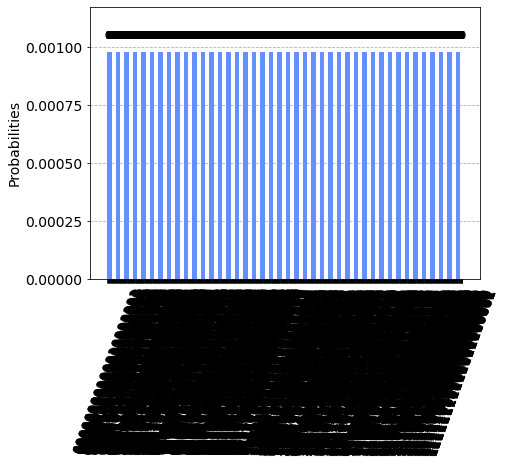

In [17]:
i=0

#print(type(np.meshgrid(gammas, betas)[0]))


#print(np.meshgrid(gammas, betas)[0].flatten().tolist())

#for (g, b) in zip(gammas, betas):
#    print(g)
#    print(b)
#    i=i+1
#    print(i)
          
#print(np.meshgrid(gammas, betas)[1])

# run on local simulator
backend = Aer.get_backend("qasm_simulator")
shots = 1024

#TQAOA = transpile(QAOA, backend)
#qobj = assemble(TQAOA, shots=shots)
#QAOA_results = backend.run(qobj).result()

#plot_histogram(QAOA_results.get_counts(),figsize = (8,6),bar_labels = False)
tl, bl = np.meshgrid(gammas, betas)
tl = tl.flatten().tolist()
bl = bl.flatten().tolist()
#job = execute(circuit, backend=backend, shots=1024, parameter_binds=[{beta: b,theta: t} for (t,b) in zip(tl,bl)])
#job = execute(circuit, backend=backend, shots=1024, parameter_binds=[{beta: 0.0,theta: t} for t in gammas])

print(circuit)

circuits = [ qc.bind_parameters({theta: t, beta: b}) for (t,b) in zip(tl, bl) ]
job = execute(circuits, backend=backend, shots=1024)

result = job.result()
counts = result.get_counts()
print(len(counts))
#print(counts)

plot_histogram(counts[0])

In [22]:
# Evaluate the data from the simulator


#hist        = {}
means = []



for count in counts:
    avr_C       = 0
    max_C       = [0,0]
    tmp_eng = 0.0
    
    for sample in list(count.keys()):
        #print(sample)
        # use sampled bit string x to compute C(x)
        x         = [2*int(num)-1 for num in list(sample)]
        #print(x)
        #print(count[sample]/shots)
        tmp_eng   = cost_function_C(x,E,V)

        # compute the expectation value and energy distribution
        avr_C     = avr_C    + count[sample]*tmp_eng
        #hist[str(round(tmp_eng))] = hist.get(str(round(tmp_eng)),0) + counts[sample]
        #print(hist)
        #plot_histogram(hist)

        # save best bit string
        if( max_C[1] < tmp_eng):
            max_C[0] = sample
            max_C[1] = tmp_eng

    M1_sampled   = avr_C/shots
    means = means + [M1_sampled]
    #print(M1_sampled)
    
print('Max means: ', max(means))
print('The approximate solution is x* = %s with C(x*) = %d \n' % (max_C[0],max_C[1]))

#Max = 4409

Max means:  299.70703125
The approximate solution is x* = 00010100010011000000 with C(x*) = 4405 



In [21]:
cost_function_C([-1,-1,-1,1,-1,1,-1,-1,-1,1,-1,-1,1,1,-1,-1,-1,-1,-1,-1], E, V)

4405.0

In [23]:
print('Circuit depth: ', qc.depth())

Circuit depth:  41
